In [2]:
# prompt: import pandas, numpu, matplotlib, seaborn, sklearn standard scaler minmax scaler kmeans and onehot encoder

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.cluster import KMeans


In [3]:
data = pd.read_csv('german_credit_data.csv')
data.head()

Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  
0           1169         6             radio/TV  
1           5951        48             radio/TV  
2           2096        12            education  
3           7882        42  furniture/equipment  
4           4870        24                  car

In [ ]:
# prompt: pandas profiling report and output in html format

!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

import pandas_profiling

profile = data.profile_report(title='Pandas Profiling Report')
profile.to_file('output.html')


     \ 17.8 MB 31.0 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 72.1 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=356234 sha256=d7c4e673d62a0275db0c351d3e9c0717d622def1e0fe002c54111822689827ed
  Stored in directory: /tmp/pip-ephem-wheel-cache-5x9a54_h/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=75c248da87923d9fb07b79d02514b86490db7672c445b902ed08f3b07cd0341f
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Succe

<ipython-input-3-ea2834ac6425>:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling
/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [5]:
data = data.drop(data.columns[0], axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


Categorical columns in this dataset are : sex, housing, saving accounts, checking accounts, purpose

Numerical columns are Age, job, Credit amount, Duration


In [7]:
# prompt: ok generate a variable categorical that has object data type from data

categorical = data.select_dtypes(include=['object'])


In [8]:
categorical

Sex Housing Saving accounts Checking account              Purpose
0      male     own             NaN           little             radio/TV
1    female     own          little         moderate             radio/TV
2      male     own          little              NaN            education
3      male    free          little           little  furniture/equipment
4      male    free          little           little                  car
..      ...     ...             ...              ...                  ...
995  female     own          little              NaN  furniture/equipment
996    male     own          little           little                  car
997    male     own          little              NaN             radio/TV
998    male    free          little           little             radio/TV
999    male     own        moderate         moderate                  car

[1000 rows x 5 columns]

In [9]:
numerical = data.select_dtypes(include=['int64'])

In [10]:
#descriptive statistics
numerical.describe()

Age          Job  Credit amount     Duration
count  1000.000000  1000.000000    1000.000000  1000.000000
mean     35.546000     1.904000    3271.258000    20.903000
std      11.375469     0.653614    2822.736876    12.058814
min      19.000000     0.000000     250.000000     4.000000
25%      27.000000     2.000000    1365.500000    12.000000
50%      33.000000     2.000000    2319.500000    18.000000
75%      42.000000     2.000000    3972.250000    24.000000
max      75.000000     3.000000   18424.000000    72.000000

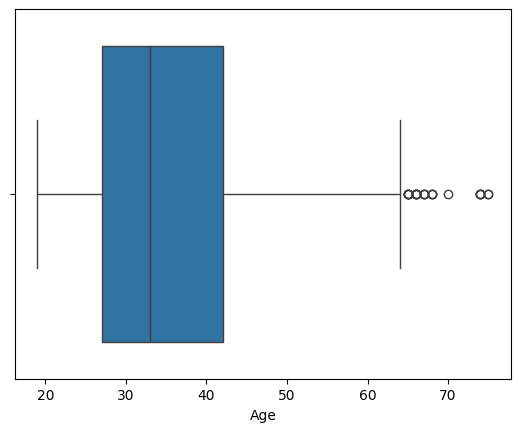

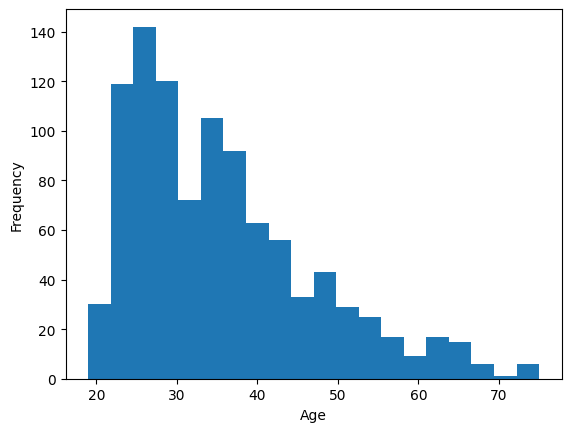

In [ ]:
# prompt: visualise box plot  and histogram for Age

import matplotlib.pyplot as plt
#box plot
sns.boxplot(x=numerical['Age'])
plt.show()

#histogram
plt.hist(numerical['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Job Skewness:  -0.3742948595135131
Job Kurtosis:  0.5018909846797865


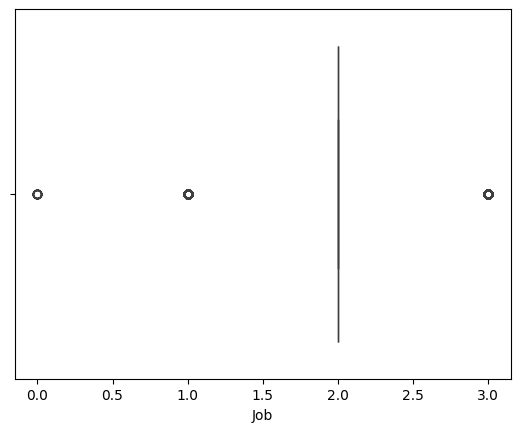

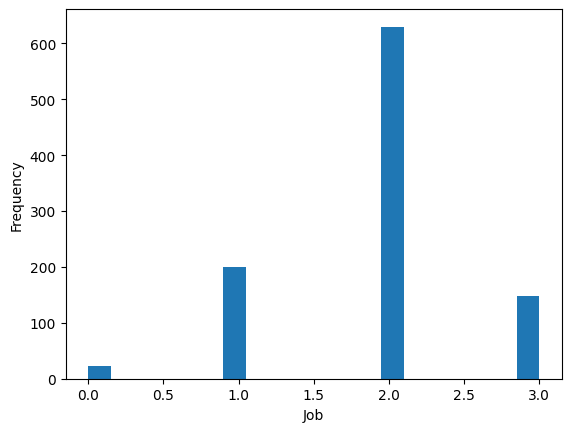

In [ ]:
# prompt: calculate job skewness and curtosis, visualise boxplot and histogram for job

import matplotlib.pyplot as plt
#calculate job skewness and curtosis
print("Job Skewness: ", numerical['Job'].skew())
print("Job Kurtosis: ", numerical['Job'].kurt())

#visualise boxplot and histogram for job
#box plot
sns.boxplot(x=numerical['Job'])
plt.show()

#histogram
plt.hist(numerical['Job'], bins=20)
plt.xlabel('Job')
plt.ylabel('Frequency')
plt.show()


Credit amount Skewness:  1.9496276798326209
Credit amount Kurtosis:  4.29259030804851


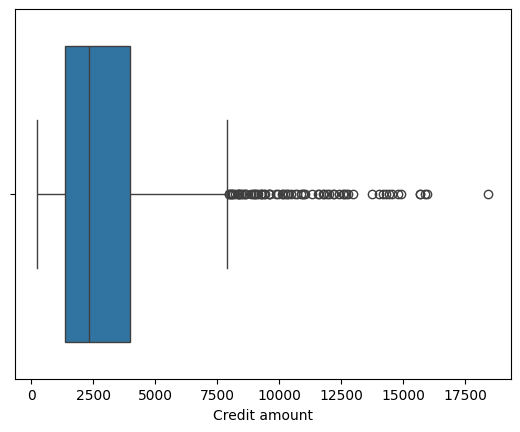

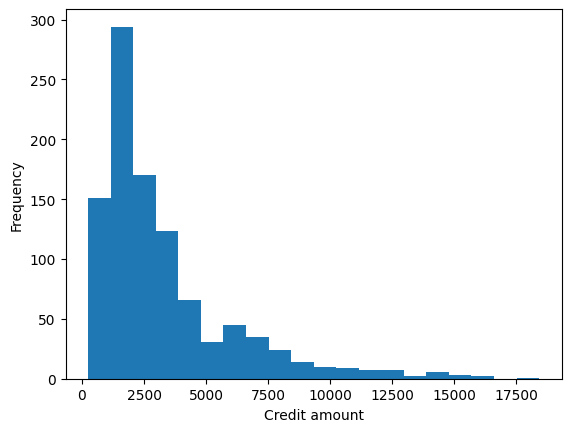

In [ ]:
# prompt: calculate credit skewness and curtosis, visualise boxplot and histogram for credit

import matplotlib.pyplot as plt
#calculate credit skewness and curtosis
print("Credit amount Skewness: ", numerical['Credit amount'].skew())
print("Credit amount Kurtosis: ", numerical['Credit amount'].kurt())

#visualise boxplot and histogram for credit amount
#box plot
sns.boxplot(x=numerical['Credit amount'])
plt.show()

#histogram
plt.hist(numerical['Credit amount'], bins=20)
plt.xlabel('Credit amount')
plt.ylabel('Frequency')
plt.show()


Duration Skewness:  1.0941841715555418
Duration Kurtosis:  0.9197813600546372


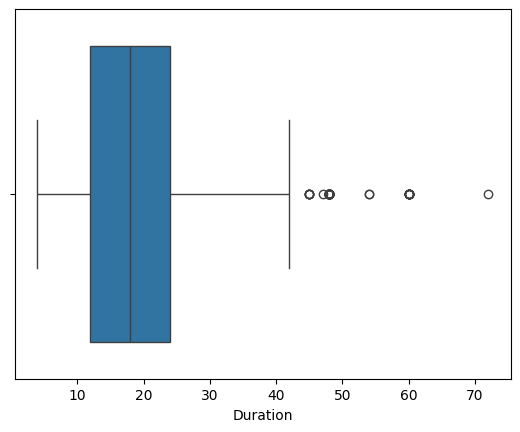

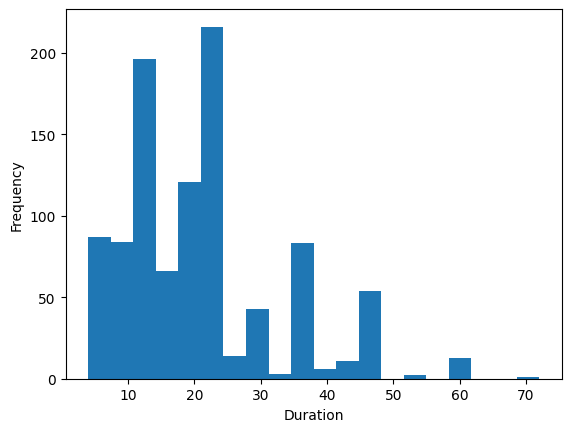

In [ ]:
# prompt: calculate credit skewness and curtosis, visualise boxplot and histogram for credit

import matplotlib.pyplot as plt
#calculate duration skewness and curtosis
print("Duration Skewness: ", numerical['Duration'].skew())
print("Duration Kurtosis: ", numerical['Duration'].kurt())

#visualise boxplot and histogram for duration
#box plot
sns.boxplot(x=numerical['Duration'])
plt.show()

#histogram
plt.hist(numerical['Duration'], bins=20)
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()


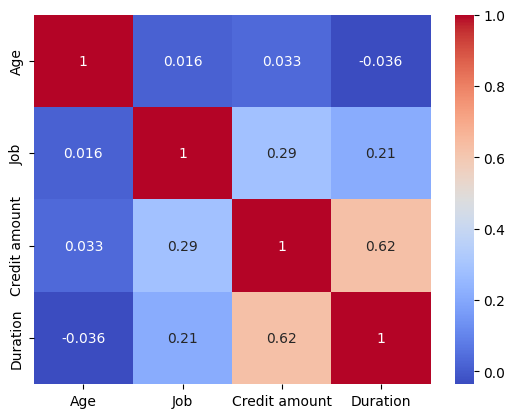

In [ ]:
# prompt: create a correlation heatmap for numerical data

import matplotlib.pyplot as plt
# calculate correlation matrix
corr = numerical.corr()

# plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


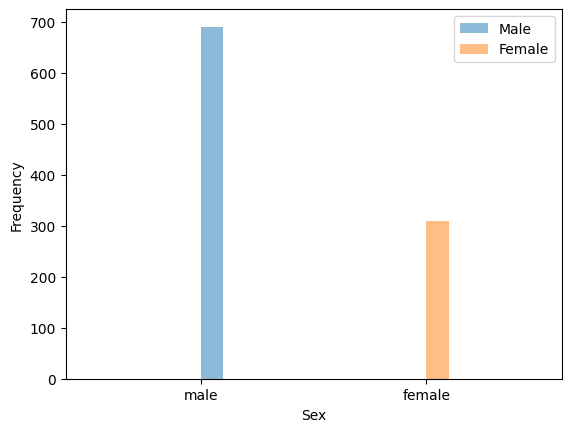

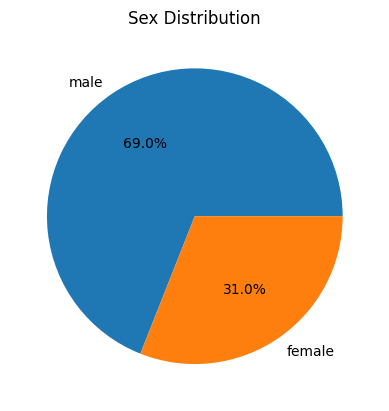

In [ ]:
# prompt: visualize a histogram for sex with both categories different, and a pie chart for sex

import matplotlib.pyplot as plt
#histogram for sex
plt.hist(categorical['Sex'][categorical['Sex'] == 'male'], alpha=0.5, label='Male')
plt.hist(categorical['Sex'][categorical['Sex'] == 'female'], alpha=0.5, label='Female')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#pie chart for sex
sex_counts = categorical['Sex'].value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%')
plt.title('Sex Distribution')
plt.show()


In [ ]:
# prompt: drop the null values in saving accounts checking accounts

data.dropna(subset=['Saving accounts', 'Checking account'], inplace=True)


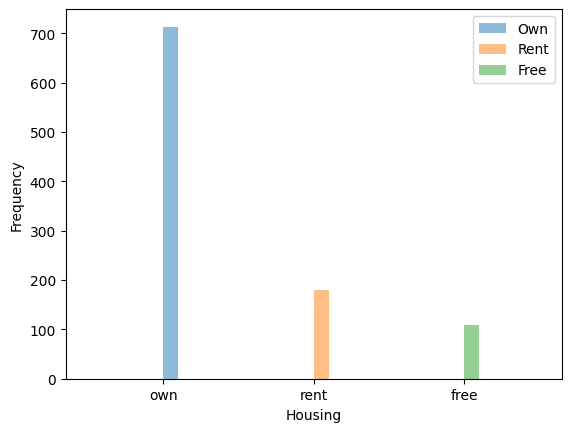

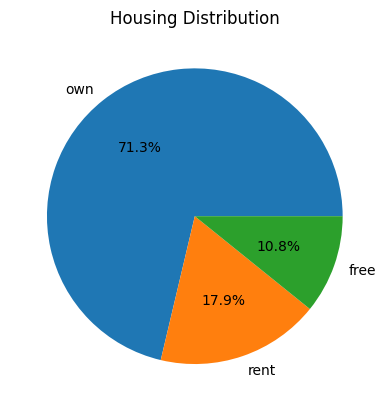

In [ ]:
# prompt: visualise a histogram and pie chart for housing

import matplotlib.pyplot as plt
#histogram for housing
plt.hist(categorical['Housing'][categorical['Housing'] == 'own'], alpha=0.5, label='Own')
plt.hist(categorical['Housing'][categorical['Housing'] == 'rent'], alpha=0.5, label='Rent')
plt.hist(categorical['Housing'][categorical['Housing'] == 'free'], alpha=0.5, label='Free')
plt.xlabel('Housing')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#pie chart for housing
housing_counts = categorical['Housing'].value_counts()
plt.pie(housing_counts, labels=housing_counts.index, autopct='%1.1f%%')
plt.title('Housing Distribution')
plt.show()


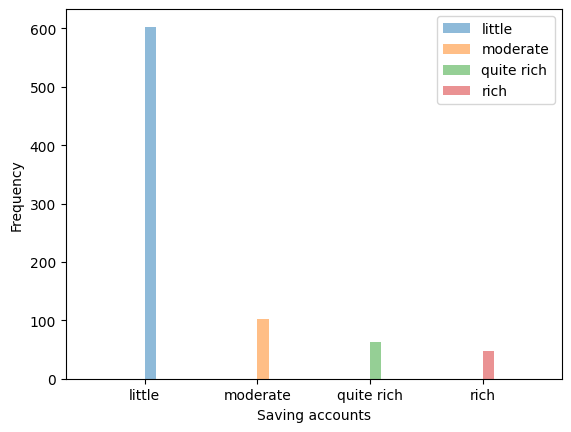

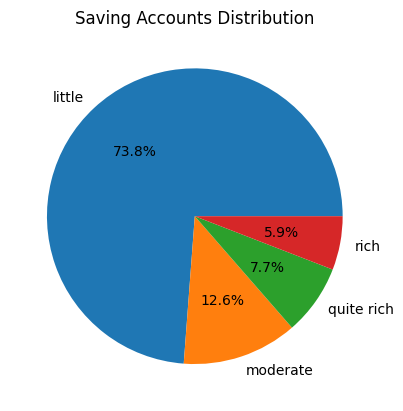

In [ ]:
# prompt: visualise a histogram and pie chart for saving account

import matplotlib.pyplot as plt
#histogram for saving account
plt.hist(categorical['Saving accounts'][categorical['Saving accounts'] == 'little'], alpha=0.5, label='little')
plt.hist(categorical['Saving accounts'][categorical['Saving accounts'] == 'moderate'], alpha=0.5, label='moderate')
plt.hist(categorical['Saving accounts'][categorical['Saving accounts'] == 'quite rich'], alpha=0.5, label='quite rich')
plt.hist(categorical['Saving accounts'][categorical['Saving accounts'] == 'rich'], alpha=0.5, label='rich')
plt.xlabel('Saving accounts')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#pie chart for saving accounts
saving_counts = categorical['Saving accounts'].value_counts()
plt.pie(saving_counts, labels=saving_counts.index, autopct='%1.1f%%')
plt.title('Saving Accounts Distribution')
plt.show()


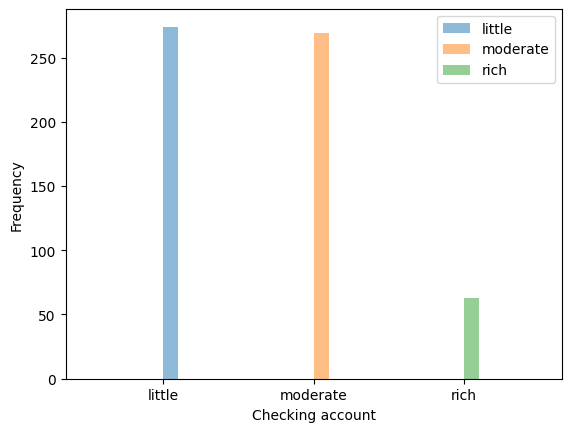

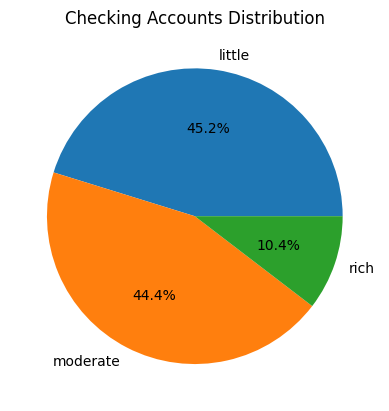

In [ ]:
# prompt: visualise a histogram and pie chart for checking account

import matplotlib.pyplot as plt
#histogram for checking account
plt.hist(categorical['Checking account'][categorical['Checking account'] == 'little'], alpha=0.5, label='little')
plt.hist(categorical['Checking account'][categorical['Checking account'] == 'moderate'], alpha=0.5, label='moderate')
plt.hist(categorical['Checking account'][categorical['Checking account'] == 'rich'], alpha=0.5, label='rich')
plt.xlabel('Checking account')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#pie chart for checking accounts
checking_counts = categorical['Checking account'].value_counts()
plt.pie(checking_counts, labels=checking_counts.index, autopct='%1.1f%%')
plt.title('Checking Accounts Distribution')
plt.show()


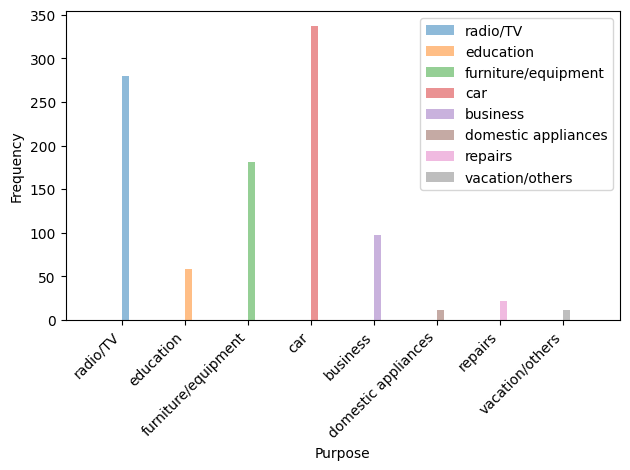

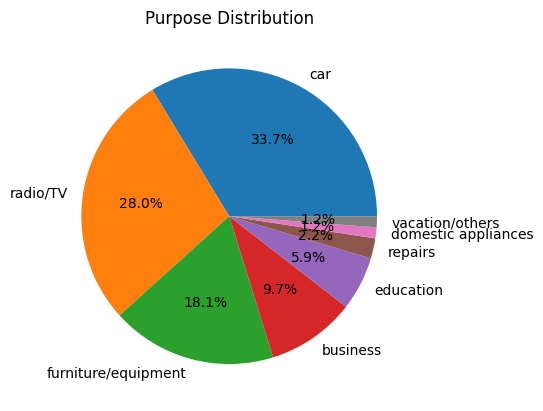

In [ ]:
# prompt: visualise purpose with histogram add space between x cordinate labels and pie chart

import matplotlib.pyplot as plt
#histogram for purpose
plt.hist(categorical['Purpose'][categorical['Purpose'] == 'radio/TV'], alpha=0.5, label='radio/TV')
plt.hist(categorical['Purpose'][categorical['Purpose'] == 'education'], alpha=0.5, label='education')
plt.hist(categorical['Purpose'][categorical['Purpose'] == 'furniture/equipment'], alpha=0.5, label='furniture/equipment')
plt.hist(categorical['Purpose'][categorical['Purpose'] == 'car'], alpha=0.5, label='car')
plt.hist(categorical['Purpose'][categorical['Purpose'] == 'business'], alpha=0.5, label='business')
plt.hist(categorical['Purpose'][categorical['Purpose'] == 'domestic appliances'], alpha=0.5, label='domestic appliances')
plt.hist(categorical['Purpose'][categorical['Purpose'] == 'repairs'], alpha=0.5, label='repairs')
plt.hist(categorical['Purpose'][categorical['Purpose'] == 'vacation/others'], alpha=0.5, label='vacation/others')
plt.xlabel('Purpose')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.legend()
plt.show()

#pie chart for purpose
purpose_counts = categorical['Purpose'].value_counts()
plt.pie(purpose_counts, labels=purpose_counts.index, autopct='%1.1f%%')
plt.title('Purpose Distribution')
plt.show()


## transform data


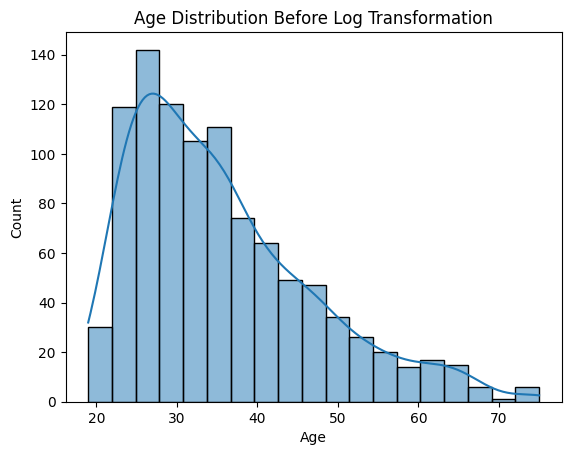

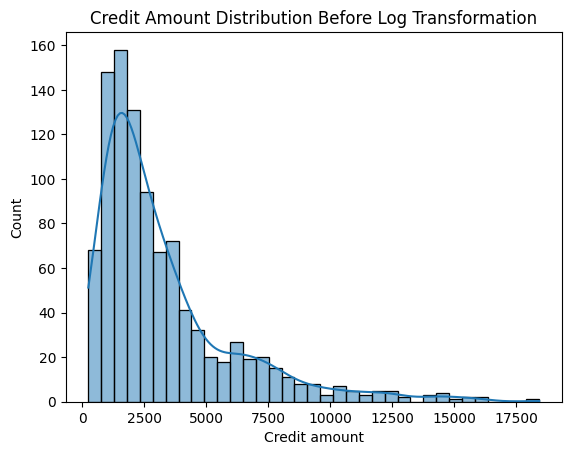

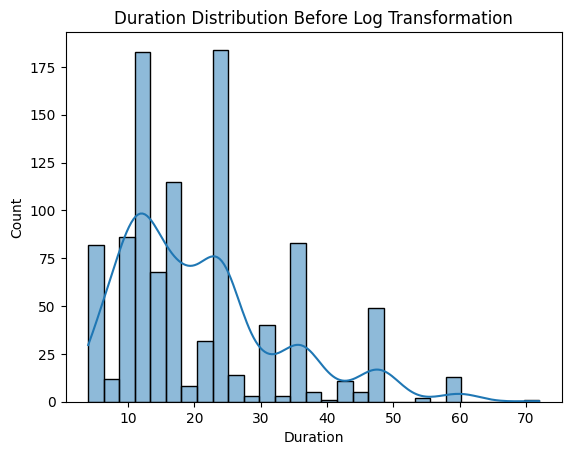

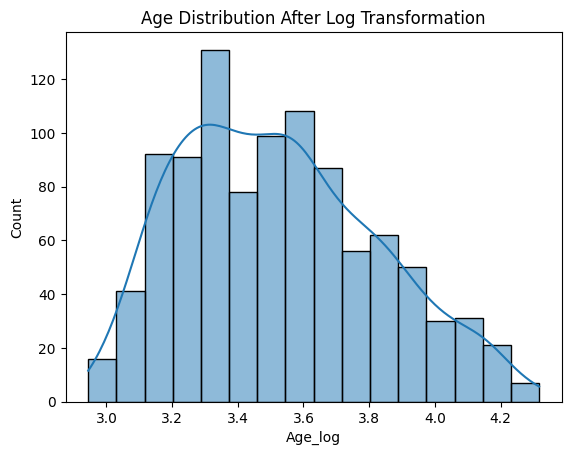

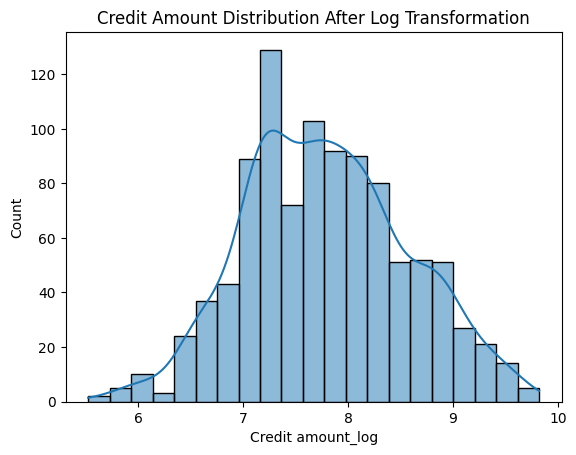

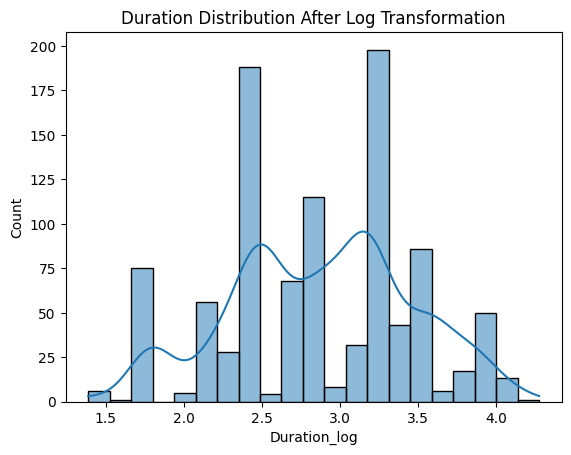

In [11]:
# prompt: generate a histplot for age, credit, duration before and after log tranformation

import matplotlib.pyplot as plt
import numpy as np
# Before transformation
sns.histplot(numerical['Age'], kde=True)
plt.title('Age Distribution Before Log Transformation')
plt.show()

sns.histplot(numerical['Credit amount'], kde=True)
plt.title('Credit Amount Distribution Before Log Transformation')
plt.show()

sns.histplot(numerical['Duration'], kde=True)
plt.title('Duration Distribution Before Log Transformation')
plt.show()

# Log transformation
numerical['Age_log'] = np.log(numerical['Age'])
numerical['Credit amount_log'] = np.log(numerical['Credit amount'])
numerical['Duration_log'] = np.log(numerical['Duration'])

# After transformation
sns.histplot(numerical['Age_log'], kde=True)
plt.title('Age Distribution After Log Transformation')
plt.show()

sns.histplot(numerical['Credit amount_log'], kde=True)
plt.title('Credit Amount Distribution After Log Transformation')
plt.show()

sns.histplot(numerical['Duration_log'], kde=True)
plt.title('Duration Distribution After Log Transformation')
plt.show()


## feature engineering

In [15]:
# prompt: use onehot encoding to convert categorical into numerical

import pandas as pd
# Assuming 'categorical' is your DataFrame with categorical columns
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_data = encoder.fit_transform(categorical)

# Convert the encoded data to a DataFrame
encoded_df = pd.DataFrame.sparse.from_spmatrix(encoded_data, columns=encoder.get_feature_names_out(categorical.columns))

# Optionally, concatenate the encoded DataFrame with your numerical data
combined_data = pd.concat([numerical, encoded_df], axis=1)


In [14]:
encoded_df


Sex_female  Sex_male  Housing_free  Housing_own  Housing_rent  \
0           0.0       1.0           0.0          1.0           0.0   
1           1.0       0.0           0.0          1.0           0.0   
2           0.0       1.0           0.0          1.0           0.0   
3           0.0       1.0           1.0          0.0           0.0   
4           0.0       1.0           1.0          0.0           0.0   
..          ...       ...           ...          ...           ...   
995         1.0       0.0           0.0          1.0           0.0   
996         0.0       1.0           0.0          1.0           0.0   
997         0.0       1.0           0.0          1.0           0.0   
998         0.0       1.0           1.0          0.0           0.0   
999         0.0       1.0           0.0          1.0           0.0   

     Saving accounts_little  Saving accounts_moderate  \
0                       0.0                       0.0   
1                       1.0                       0.0   
2                       1.0                       0.0   
3                       1.0                       0.0   
4                       1.0                       0.0   
..                      ...                       ...   
995                     1.0                       0.0   
996                     1.0                       0.0   
997                     1.0                       0.0   
998                     1.0                       0.0   
999                     0.0                       1.0   

     Saving accounts_quite rich  Saving accounts_rich  Saving accounts_nan  \
0                           0.0                   0.0                  1.0   
1                           0.0                   0.0                  0.0   
2                           0.0                   0.0                  0.0   
3                           0.0                   0.0                  0.0   
4                           0.0                   0.0                  0.0   
..                          ...                   ...                  ...   
995                         0.0                   0.0                  0.0   
996                         0.0                   0.0                  0.0   
997                         0.0                   0.0                  0.0   
998                         0.0                   0.0                  0.0   
999                         0.0                   0.0                  0.0   

     ...  Checking account_rich  Checking account_nan  Purpose_business  \
0    ...                    0.0                   0.0               0.0   
1    ...                    0.0                   0.0               0.0   
2    ...                    0.0                   1.0               0.0   
3    ...                    0.0                   0.0               0.0   
4    ...                    0.0                   0.0               0.0   
..   ...                    ...                   ...               ...   
995  ...                    0.0                   1.0               0.0   
996  ...                    0.0                   0.0               0.0   
997  ...                    0.0                   1.0               0.0   
998  ...                    0.0                   0.0               0.0   
999  ...                    0.0                   0.0               0.0   

     Purpose_car  Purpose_domestic appliances  Purpose_education  \
0            0.0                          0.0                0.0   
1            0.0                          0.0                0.0   
2            0.0                          0.0                1.0   
3            0.0                          0.0                0.0   
4            1.0                          0.0                0.0   
..           ...                          ...                ...   
995          0.0                          0.0                0.0   
996          1.0                          0.0                0.0   
997          0.0             

In [16]:
combined_data

Age  Job  Credit amount  Duration   Age_log  Credit amount_log  \
0     67    2           1169         6  4.204693           7.063904   
1     22    2           5951        48  3.091042           8.691315   
2     49    1           2096        12  3.891820           7.647786   
3     45    2           7882        42  3.806662           8.972337   
4     53    2           4870        24  3.970292           8.490849   
..   ...  ...            ...       ...       ...                ...   
995   31    1           1736        12  3.433987           7.459339   
996   40    3           3857        30  3.688879           8.257645   
997   38    2            804        12  3.637586           6.689599   
998   23    2           1845        45  3.135494           7.520235   
999   27    2           4576        45  3.295837           8.428581   

     Duration_log  Sex_female  Sex_male  Housing_free  ...  \
0        1.791759         0.0       1.0           0.0  ...   
1        3.871201         1.0       0.0           0.0  ...   
2        2.484907         0.0       1.0           0.0  ...   
3        3.737670         0.0       1.0           1.0  ...   
4        3.178054         0.0       1.0           1.0  ...   
..            ...         ...       ...           ...  ...   
995      2.484907         1.0       0.0           0.0  ...   
996      3.401197         0.0       1.0           0.0  ...   
997      2.484907         0.0       1.0           0.0  ...   
998      3.806662         0.0       1.0           1.0  ...   
999      3.806662         0.0       1.0           0.0  ...   

     Checking account_rich  Checking account_nan  Purpose_business  \
0                      0.0                   0.0               0.0   
1                      0.0                   0.0               0.0   
2                      0.0                   1.0               0.0   
3                      0.0                   0.0               0.0   
4                      0.0                   0.0               0.0   
..                     ...                   ...               ...   
995                    0.0                   1.0               0.0   
996                    0.0                   0.0               0.0   
997                    0.0                   1.0               0.0   
998                    0.0                   0.0               0.0   
999                    0.0                   0.0               0.0   

     Purpose_car  Purpose_domestic appliances  Purpose_education  \
0            0.0                          0.0                0.0   
1            0.0                          0.0                0.0   
2            0.0                          0.0                1.0   
3            0.0                          0.0                0.0   
4            1.0                          0.0                0.0   
..           ...                          ...                ...   
995          0.0                          0.0                0.0   
996          1.0                          0.0                0.0   
997          0.0                          0.0                0.0   
998          0.0                          0.0                0.0   
999          1.0                          0.0                0.0   

     Purpose_furniture/equipment  Purpose_radio/TV  Purpose_repairs  \
0                            0.0               1.0              0.0   
1                            0.0               1.0              0.0   
2                            0.0               0.0              0.0   
3                            1.0               0.0              0.0   
4                            0.0               0.0              0.0   
..                           ...               ...              ...   
995                          1.0               0.0              0.0   
996                          0.0               0.0              0.0   
997                          0.0               1.0              0.0   
998                          0.0       

## Kmeans clustering


### lets use Age, credit, duration for K means

In [18]:
num_columns = ['Age', 'Credit amount', 'Duration']
cluster_data = data.loc[:, num_columns]

## Scale the features using log transform

In [20]:
cluser_log = np.log(cluster_data)

### scaling

In [21]:
# prompt: scale the log transformed data

scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluser_log)


### Elbow method used to find best number of K in Kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

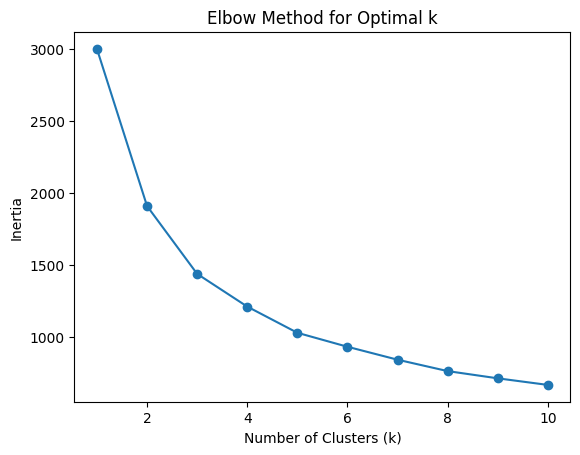

In [22]:
# prompt:  k means scaled data using elbow plot method

import matplotlib.pyplot as plt
# Calculate inertia for different values of k
inertia = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(scaled_data)
  inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


### here the elbow point can be considered as 3

Lets try silhoutte to make sure

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

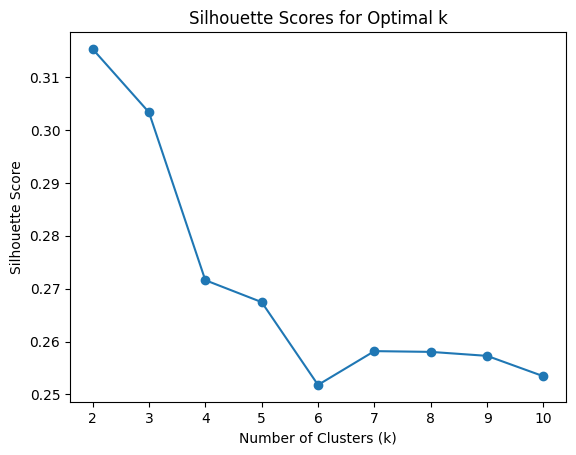

In [24]:
# prompt: use silhoutte method to find the cluster number

import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for different values of k
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(scaled_data)
  labels = kmeans.labels_
  silhouette_scores.append(silhouette_score(scaled_data, labels))

# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


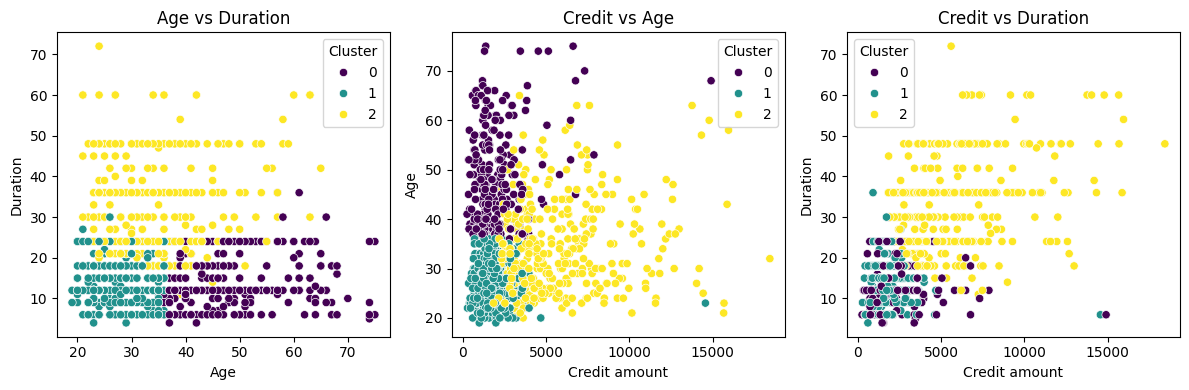

In [39]:
# prompt: perform k means clustering for k =3 where there are 3 scatter plots , age vs duration, credit vs age , credit vs duration

import matplotlib.pyplot as plt
# Perform K-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)
labels = kmeans.labels_

# Add cluster labels to the original DataFrame
cluster_data['Cluster'] = labels

# Create scatter plots
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.scatterplot(x='Age', y='Duration', hue='Cluster', data=cluster_data, palette='viridis')
plt.title('Age vs Duration')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Credit amount', y='Age', hue='Cluster', data=cluster_data, palette='viridis')
plt.title('Credit vs Age')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Credit amount', y='Duration', hue='Cluster', data=cluster_data, palette='viridis')
plt.title('Credit vs Duration')

plt.tight_layout()
plt.show()


## 3 categories of clusers

cluster 0 ❎ middle aged,lesser duration, low credit amount             

cluster 1 😵 young aged, lesser duration, low credit amount

cluster 2 ❌ younger & middle aged, longer duration, medium to higher credit amount
